# Para este documento se hace uso del archivo Train_Set.csv

### Se hace una importación de las librerias necesarias para la manipulación de los datos, usar gráficas y funciones que ayuden con con el proceso exploratorio de los datos

In [16]:
import matplotlib as plt
from matplotlib import pyplot
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats

### Los datos se guardan en un tipo de dato llamado dataFrame propio de python que permite la manipulación de los mismos por medio de los nombres de las columnas, se pueden leer varios tipos de dato desde CSV hasta PDF, en este caso, un archivo CSV, y por medio de la función head del dataframe hacemos un vistaso de los primeros 5 datos de todo el dataset

In [17]:
daf = pd.read_csv("Train_Set.csv")
daf.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,A00001,Male,0,Yes,Yes,66,Yes,Yes,DSL,No,...,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),79.85,5234.95,No
1,A00002,Male,0,No,No,29,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.80,572.2,No
2,A00003,Male,0,No,No,9,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.50,597.9,No
3,A00004,Male,1,Yes,Yes,26,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,105.75,2710.25,Yes
4,A00005,Male,0,Yes,Yes,55,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.50,1026.35,No


### En esta sección se hace una exploración rápida de los datos, por ejemplo revisando el tipo de dato de cada columna y si hay algún valor dentro del dataset que es nulo 

In [18]:
daf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6143 entries, 0 to 6142
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6143 non-null   object 
 1   gender            6143 non-null   object 
 2   SeniorCitizen     6143 non-null   int64  
 3   Partner           6143 non-null   object 
 4   Dependents        6143 non-null   object 
 5   tenure            6143 non-null   int64  
 6   PhoneService      6143 non-null   object 
 7   MultipleLines     6143 non-null   object 
 8   InternetService   6143 non-null   object 
 9   OnlineSecurity    6143 non-null   object 
 10  OnlineBackup      6143 non-null   object 
 11  DeviceProtection  6143 non-null   object 
 12  TechSupport       6143 non-null   object 
 13  StreamingTV       6143 non-null   object 
 14  StreamingMovies   6143 non-null   object 
 15  Contract          6143 non-null   object 
 16  PaperlessBilling  6143 non-null   object 


### Uno de los primeros análisis que se decide hacer es un análisis de correlación de todas las variables, para esto es necesario que todos los datos sean de tipo numérico y no tipo objeto, puesto la función de correlación no admite operaciones con tipos de datos no numéricos.

### Dado lo anterior se realizan algunas funciones para realizar conversiones varias veces ya que en algunos casos el contenido de las etiquetas dentro de las columnas es similar para algunas.

In [19]:
def convertir_yes_no(columna,daf):
    daf[columna].replace("Yes", 1, inplace=True)
    daf[columna].replace("No", 0, inplace=True)
    
def labeling(column_name,daf):
    daf[column_name].replace("Yes", 1, inplace=True)
    daf[column_name].replace("No", 0, inplace=True)
    daf[column_name].replace("No internet service", 2, inplace=True)

### Llamamos las funciones y hacemos las conversión de los datos, se hace una asignación de etiquetas numéricas dependiendo de las categorias que se encuentren dentro de una determinada columna

In [20]:
daf["InternetService"].replace("DSL", 1, inplace=True)
daf["InternetService"].replace("No", 0, inplace=True)
daf["InternetService"].replace("Fiber optic", 2, inplace=True)

daf["PaymentMethod"].replace("Bank transfer (automatic)", 1, inplace=True)
daf["PaymentMethod"].replace("Mailed check", 0, inplace=True)
daf["PaymentMethod"].replace("Electronic check", 2, inplace=True)
daf["PaymentMethod"].replace("Credit card (automatic)", 3, inplace=True)

daf["Contract"].replace("One year", 1, inplace=True)
daf["Contract"].replace("Month-to-month", 0, inplace=True)
daf["Contract"].replace("Two year", 2, inplace=True)

daf["MultipleLines"].replace("Yes", 1, inplace=True)
daf["MultipleLines"].replace("No", 0, inplace=True)
daf["MultipleLines"].replace("No phone service", 2, inplace=True)

daf["gender"].replace("Male", 1, inplace=True)
daf["gender"].replace("Female", 0, inplace=True)

lista = ['Dependents','PhoneService','PaperlessBilling','Churn','Partner']
for valor in lista:
    convertir_yes_no(valor,daf)
    
nombres = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for nombre in nombres:
    labeling(nombre,daf)

In [21]:
s = pd.Series(daf["TotalCharges"])
series = pd.to_numeric(s, errors='coerce')
series.to_frame()
daf.drop("TotalCharges", axis = 1, inplace=True)
daf = pd.concat([daf, series], axis=1)

### Verificamos que todos los datos estén de tipo numérico ya sea por el propio valor de la columna como la etiqueta que hubieramos denominado según el caso

In [22]:
daf.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,TotalCharges
0,A00001,1,0,1,1,66,1,1,1,0,...,1,0,1,1,2,0,1,79.85,0,5234.95
1,A00002,1,0,0,0,29,1,0,0,2,...,2,2,2,2,1,1,0,19.80,0,572.20
2,A00003,1,0,0,0,9,1,0,2,0,...,0,0,0,0,0,1,2,70.50,0,597.90
3,A00004,1,1,1,1,26,1,1,2,0,...,1,0,1,1,0,0,2,105.75,1,2710.25
4,A00005,1,0,1,1,55,1,0,0,2,...,2,2,2,2,1,0,0,19.50,0,1026.35


### Aplicamos la función de correlación de todos los datos y verificamos si podemos encontrar alguna relacioón fuerte entre los datos

In [23]:
daf.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,TotalCharges
gender,1.000000,0.004128,-0.002392,0.013789,-0.005380,0.000776,-0.005190,-0.010265,-0.007367,0.000020,0.005026,-0.002504,-0.001986,-0.004431,-0.009188,-0.010421,-0.012139,-0.014556,-0.002189,-0.007259
SeniorCitizen,0.004128,1.000000,0.017530,-0.208232,0.015364,0.009157,0.095558,0.258105,-0.208941,-0.155513,-0.159886,-0.225279,-0.133970,-0.122528,-0.145898,0.162929,0.115525,0.217350,0.151549,0.099047
Partner,-0.002392,0.017530,1.000000,0.448856,0.380337,0.020394,0.091405,0.007674,0.077504,0.082875,0.087529,0.064597,0.072774,0.069267,0.294930,-0.012398,0.070627,0.102254,-0.146345,0.321572
Dependents,0.013789,-0.208232,0.448856,1.000000,0.156960,0.000278,-0.014958,-0.178461,0.188293,0.162062,0.156081,0.177653,0.138598,0.125726,0.241111,-0.115484,-0.046874,-0.114307,-0.158547,0.064316
tenure,-0.005380,0.015364,0.380337,0.156960,1.000000,0.013201,0.242274,0.040678,0.140104,0.171008,0.174718,0.138178,0.130570,0.134340,0.666252,0.016940,0.186931,0.253725,-0.344614,0.827143
PhoneService,0.000776,0.009157,0.020394,0.000278,0.013201,1.000000,-0.695670,0.092562,0.131238,0.153560,0.140580,0.125450,0.178333,0.166689,0.004683,0.019068,-0.004693,0.247863,0.009704,0.116131
MultipleLines,-0.005190,0.095558,0.091405,-0.014958,0.242274,-0.695670,1.000000,0.174186,-0.237949,-0.211143,-0.201525,-0.230898,-0.205783,-0.195490,0.078886,0.109393,0.133426,0.143021,0.018613,0.250177
InternetService,-0.010265,0.258105,0.007674,-0.178461,0.040678,0.092562,0.174186,1.000000,-0.763949,-0.687799,-0.683151,-0.760916,-0.618716,-0.620765,-0.289040,0.387647,0.280656,0.906128,0.315037,0.433142
OnlineSecurity,-0.007367,-0.208941,0.077504,0.188293,0.140104,0.131238,-0.237949,-0.763949,1.000000,0.752296,0.749410,0.790280,0.703691,0.705568,0.386978,-0.334040,-0.219681,-0.620152,-0.326741,-0.154867
OnlineBackup,0.000020,-0.155513,0.082875,0.162062,0.171008,0.153560,-0.211143,-0.687799,0.752296,1.000000,0.741022,0.754486,0.721807,0.717629,0.348435,-0.263399,-0.182499,-0.539593,-0.286546,-0.090925


### Puesto que es algo complicado mirar una tabla de correlación de solo números se procede a realizar la tabla de correlación teniendo en cuenta un mapa de calor, que nos dirá con mayor facilidad la relación que se pueda encontrar entre las variables

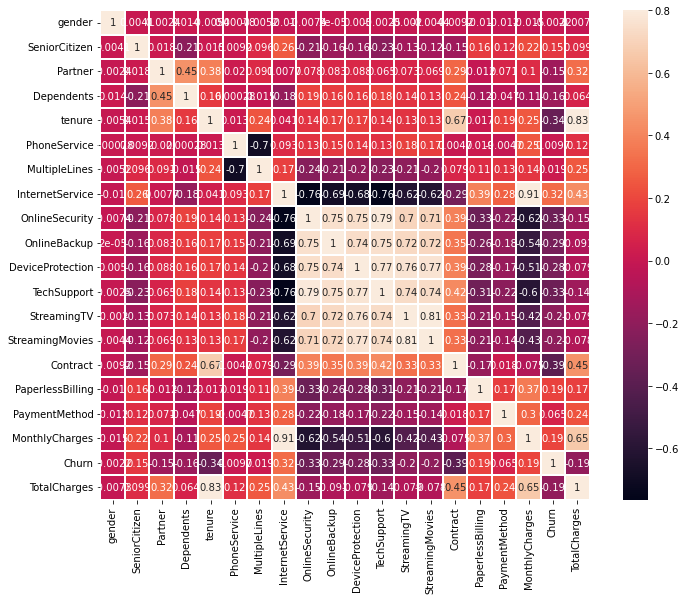

In [24]:
corrmat = daf.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, linewidths=0.01,linecolor='white',square=True,annot=True);

### El anterior gráfico corresponde a una matriz de correlación en forma de mapa de calor, el cual nos permite ver con claridad la correlación que hay entre las distintas columnas del data set, para este caso nuestra variable objetivo es identificar las causas del porque los usuarios deciden suspender el servicio con la empresa ("Churn")

In [25]:
def detectar_correlacion(variable_objetivo):
    """
    La función devuelve en orden descendente la correlación de una variable objetivo
    que es pasada como parametro de la función.
    """
    corr = daf.corr()
    return corr[[variable_objetivo]].sort_values(by = variable_objetivo,ascending = False).style.background_gradient()

In [44]:
detectar_correlacion('InternetService')

,InternetService
InternetService,1.000000
MonthlyCharges,0.906128
TotalCharges,0.433142
PaperlessBilling,0.387647
Churn,0.315037
PaymentMethod,0.280656
SeniorCitizen,0.258105
MultipleLines,0.174186
PhoneService,0.092562
tenure,0.040678


#### La anterior función detectar_correlacion() permite pasar como parámetro cualquiera de las columnas del data set de tal manera que se puede hacer una visualización por medio de vector de calor la correlación de las variables del data set en comparación con la columna pasada como parámetro a la función.

#### Como se observó en el mapa de calor de correlación se observarón las siguiente correlaciones, entre las variables:

#### Churn con InternetService una correlación ---> 0.31

#### tenure con TotalCharges y Contract ---> 0.82 y 0.66 respectivamente

#### MonthlyCharges con InternetService y TotalCharges ---> 0.90 y 0.65 respectivamente

#### Contract con tenure, TotalCharges y TechSupport ---> 0.66, 0.44 y 0.41 respectivamente

#### StreamingTV con StreamingMovies, DeviceProtection, TechSupport, OnlineBackup y OnlineSecurity ---> 0.81, 0.76, 0.73, 0.72 y 0.70 respectivamente

In [27]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
!pip install plotly
#Importing the data
df = pd.read_csv("Train_Set.csv")

In [28]:
# it's a library that we work with plotly
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go        # it's like "plt" of matplot
import plotly.tools as tls            # It's useful to we get some tools of plotly
import warnings                       # This library will be used to ignore some warnings
from collections import Counter       # To do counter of some features

"""
Esta porción de código se encarga de imprimir la variable objetivo del problema (Churn) la cual nos indica las
personas que abandonaron el servicio (Yes) y las que no (No)
"""
trace0 = go.Bar(
            x = df[df["Churn"]== 'Yes']["Churn"].value_counts().index.values,
            y = df[df["Churn"]== 'Yes']["Churn"].value_counts().values,
            name='Abandonaron'
    )

trace1 = go.Bar(
            x = df[df["Churn"]== 'No']["Churn"].value_counts().index.values,
            y = df[df["Churn"]== 'No']["Churn"].value_counts().values,
            name='No Abandonaron'
    )

data = [trace0, trace1]

layout = go.Layout(
    
)

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Churn variable'
    ),
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

### Para la gráfica anterior se muestra la cantidad de personas que abandonaron el sercicio y las que no lo hicieron teniendo en cuenta la cantidad de personas según sea el caso.

In [43]:
df_yes = df.loc[df["Churn"] == 'Yes']['tenure'].values.tolist()
df_no = df.loc[df["Churn"] == 'No']['tenure'].values.tolist()
df_tenure = df['tenure'].values.tolist()

#First plot
trace0 = go.Histogram(
    x=df_yes,
    histnorm='probability',
    name="Abandonaron"
)
#Second plot
trace1 = go.Histogram(
    x=df_no,
    histnorm='probability',
    name="No Abandonaron"
)
#Third plot
trace2 = go.Histogram(
    x=df_tenure,
    histnorm='probability',
    name="Tiempo con el servicio"
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Abandonaron','No Abandonaron', 'General Distribuition'))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Abandono vs tiempo', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

"""
Esta porción de código hace una gráfica de nuestra variable objetivo en función del tiempo que los clientes permanecen o no
con el servicio, además de ello hace una gráfica general de distribución de los datos.
Mediante un estudio más detallado de ser posible y tener datos que puedan describir como está siendo entregado el contenido al
cliente a inicios de su adquisición se podría ver la posibilidad de mitigar esta deserción en los primeros meses.
"""

'\nEsta porción de código hace una gráfica de nuestra variable objetivo en función del tiempo que los clientes permanecen o no\ncon el servicio, además de ello hace una gráfica general de distribución de los datos.\nMediante un estudio más detallado de ser posible y tener datos que puedan describir como está siendo entregado el contenido al\ncliente a inicios de su adquisición se podría ver la posibilidad de mitigar esta deserción en los primeros meses.\n'

### La siguiente gráfica muestra la distribución de los datos con respecto a la variable objetivo, se observa como en los primersos meses de uso del servicio se genera una alta deserción de los clientes con respecto al servicio adquirido, por otro lado para aquellos clientes que permanecieron se nota una fidelización alta de los mismos al pasar los meses

C:\Users\seran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\seran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



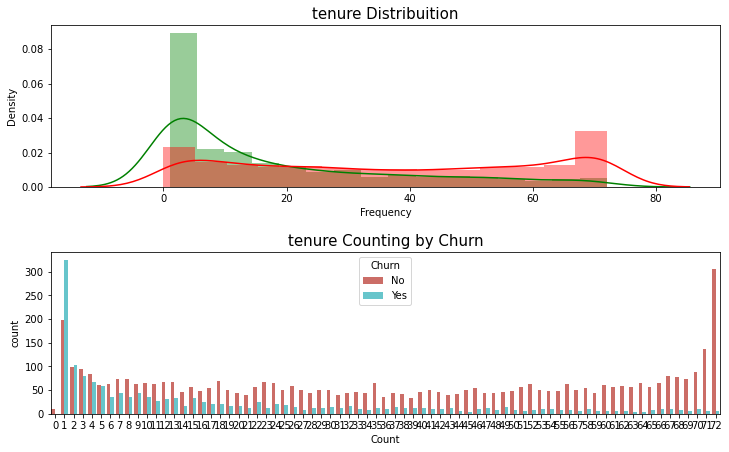

In [30]:
df_yes = df[df["Churn"] == 'Yes']
df_no = df[df["Churn"] == 'No']

fig, ax = plt.subplots(nrows=2, figsize=(12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

g1 = sns.distplot(df_yes["tenure"], ax=ax[0], 
             color="g")
g1 = sns.distplot(df_no["tenure"], ax=ax[0], 
             color='r')
g1.set_title("tenure Distribuition", fontsize=15)
g1.set_xlabel("tenure")
g1.set_xlabel("Frequency")

g2 = sns.countplot(x="tenure",data=df, 
              palette="hls", ax=ax[1], 
              hue = "Churn")
g2.set_title("tenure Counting by Churn", fontsize=15)
g2.set_xlabel("tenure")
g2.set_xlabel("Count")
plt.show()

### La siguiente función realiza gráfica de barras dependiendo de las etiquedas enviadas, en este caso el primer parámetro que se envía es la variable objetivo y la segunda es la variable contra la cual se va a comparar la vairable objetivo

In [31]:
def grafica_de_barras(target, variable_comparada):
    #First plot
    trace0 = go.Bar(
        x = df[df[target]== 'Yes'][variable_comparada].value_counts().index.values,
        y = df[df[target]== 'Yes'][variable_comparada].value_counts().values,
        name='Abandonaron'
    )

    #Second plot
    trace1 = go.Bar(
        x = df[df[target]== 'No'][variable_comparada].value_counts().index.values,
        y = df[df[target]== 'No'][variable_comparada].value_counts().values,
        name="No abandonaron"
    )

    data = [trace0, trace1]

    layout = go.Layout(
        title= variable_comparada +' Distribution'
    )


    fig = go.Figure(data=data, layout=layout)

    py.iplot(fig, filename= variable_comparada + '-Grouped')

### La gráfica que se muestra a continuación es una comparación entre la variable objetivo "Churn" y el tipo de internet que tiene el cliente, fibra optica, DSL o no tiene el servicio, se observa como las personas dejan de usar el servicio  por el hecho de ser fibra optica

In [32]:
grafica_de_barras("Churn","InternetService")

### Por otra parte con respecto al servicio de telefonía la persona está en un promedio de conformidad aceptable puesto que tiene un porcentaje de 21.6% en las personas que dejaron de usar el servicio

In [33]:
grafica_de_barras("Churn","PhoneService")

### En cuanto al método de pago se observa que las personas muestran una inconformidad por el método de pago, prefieren hacerlo por medio de tarjeta de crédito y que se descuente automáticamente de su cuenta sin ellos tener que realizar alguna acción adicional.

In [45]:
grafica_de_barras("Churn","PaymentMethod")

### Por otro lado el tipo de contrato tiene peso en cuanto al tiempo en que una cliente permanece con el servicio, incluso se puede hacer una relación entre el metodo de pago, si la persona adquiere el servicio mes a mes y adicionalmente paga con el método Electronic check habrá una probabilidad de abandono del servicio, sin embargo si la persona adquiere un tipo de contrado a mayor tiempo, por ejemplo a dos años y con pago por medio de tarjeta de crédito de forma automática esto generará una mayor conformidad por parte del cliente

In [35]:
grafica_de_barras("Churn","Contract")

### Para el caso en que el cliente sea una persona mayor se observa que hay una mayor concentración de los datos en cuanto si la persona no es de edad tan avanzada, por lo tanto se podrían ofrecer planes que vayan dirigidos a un rango de edades en donde se pueda fidelizar más este tipo de clientes

In [36]:
grafica_de_barras("Churn","SeniorCitizen")

### En el caso en que la persona tenga algún acompañante o no, en los casos en lo que no tiene el cliente deja de usar el servicio, se podría generar algún tipo de producto que vaya dirigido a estas personas que estan solas.

In [37]:
grafica_de_barras("Churn","Partner")

### El hecho de tener o no tener multiples lineas telefonicas no es un indicador tan fuerte de que el cliente pueda abandonar, puesto que el porcentaje que dejo el servicio teniendo en cuenta las multiples lineas no difieren mucho entre sí.

In [38]:
grafica_de_barras("Churn","MultipleLines")

In [39]:
#First plot
trace0 = go.Bar(
    x = df[df["Churn"]== 'Yes']["gender"].value_counts().index.values,
    y = df[df["Churn"]== 'Yes']["gender"].value_counts().values,
    name='Abandono'
)

#First plot 2
trace1 = go.Bar(
    x = df[df["Churn"]== 'No']["gender"].value_counts().index.values,
    y = df[df["Churn"]== 'No']["gender"].value_counts().values,
    name="No Abandono"
)

#Second plot
trace2 = go.Box(
    x = df[df["Churn"]== 'Yes']["gender"],
    y = df[df["Churn"]== 'Yes']["TotalCharges"],
    name=trace0.name
)

#Second plot 2
trace3 = go.Box(
    x = df[df["Churn"]== 'No']["gender"],
    y = df[df["Churn"]== 'No']["TotalCharges"],
    name=trace1.name
)

data = [trace0, trace1, trace2,trace3]


fig = tls.make_subplots(rows=1, cols=2, 
                        subplot_titles=('Gender Count', 'TotalCharges Amount by Gender'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 2)

fig['layout'].update(height=400, width=800, title='Gender Distribuition', boxmode='group')
py.iplot(fig, filename='Gender-subplot')

C:\Users\seran\anaconda3\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



### Por último se observa que el genero no está fuertemente relacionado a ninguna de las variables relacionadas en el estudio de los datos, lo cual nos dice que no hay necesidad de sesgar el producto adquirido por el cliente de acuerdo a su género.

# Propuesta de KPI's

### PaymentMethod KPI = 0.66
Se tiene que para los método de págo exceptuando Electronic Check hay un 66% de las personas que no abandonan el servicio, razón por la cual se puede aplicar estrategias para seguir aumentando este indicador y dar menos prioriodad al método de pago excluido, una de las formas de potenciarlos podría ser en las plataformas donde los usuarios hacen los procedimientos de pago resaltar estos métodos para así llamar más la atención de aquellos que realizan Electronic Check de esta forma se podría estar recuperando los clientes que abandonan el servicio además de estar fortaleciendo los demás métodos de pago y el propio KPI.

### Contract KPI = 0.45
Para los tipos de contrato que maneja la empresa hay un 45% que corresponde a los contratos a término mes a mes esto a su vez implica un mayor porcentaje de deserción por parte de los clientes, mientras que para contratos a largo plazo hay menos deserción, la meta para este KPI sería reducirlo fortaleciendo los contratos a más duración, tal vez agregando alguno tipo de beneficio adicional o haciendole ver al cliente que al momento de hacer una adquisición por un lapso de tiempo más prolongado puede ahorrar cierta cantidad de dinero. De esta manera disminuiría el KPI y ser fortalecerían los otros tipos de contrato fidelizando al usuario.

### Partner KPI = 0.517
En los casos en que los clientes tienen un partner (acompañante o pareja) se observa un 51.7% de población en la que tiene partner y hay menos deserción del servicio, para este KPI la idea sería aumentarlo promoviendo contenido que lleve a las personas a querer compartir este contenido audiovisual como peliculas en streaming en compañia de alguien. Para este caso se podría estar ganando por partida doble, puesto que un cliente podría estar atrayendo a otro que quiera vivir de la misma experiencia con su familia o algún circulo de personas cercanas a él.

### SeniorCitizen KPI = 0.83
Este KPI que implica el grupo en el cual se encuentran los clientes sean adultos mayores o no da una ruta mucho más clara de cual debe ser el cliente objetivo para los servicios que ofrece la empresa, en este caso usuarios que no son adultos mayores, por lo tanto para este caso el objetivo para el KPI es de aumentarlo. Para mejorar esta métrica se puede brinar productos más enfocados a personas jovenes.